<a href="https://colab.research.google.com/github/Aditi-0209/Pixel-Read/blob/main/Pixel_Read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mnist Data

In [ ]:
from tensorflow.keras.datasets import mnist

#Importing dataset from tensorflow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

6


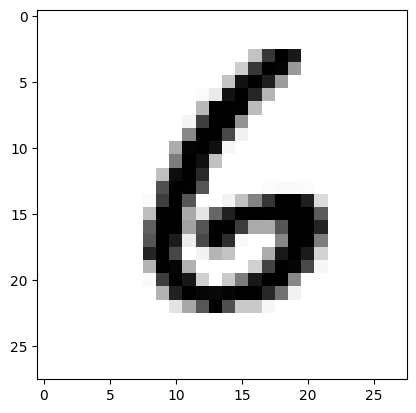

In [ ]:
import matplotlib.pyplot as plt

digit = train_images[6000]
print(train_labels[6000])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# Doing normalization of the data
train_images = train_images.reshape(-1,28,28,1).astype('float32')/255
test_images = test_images.reshape(-1,28,28,1).astype('float32')/255

In [ ]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

In [ ]:
datagen.fit(train_images)

In [ ]:
#Let's build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)), # Layer 1
    BatchNormalization(),
    MaxPooling2D((2,2)), # Layer 2
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'), # Layer 3
    BatchNormalization(),
    MaxPooling2D((2,2)), # Layer 4
    Dropout(0.25),

    Flatten(),
    Dense(128,activation='relu'), # Layer 5
    BatchNormalization(),
    Dropout(0.25),

    Dense(10, activation='softmax') # Layer 6

])

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

batch_size = 64

history = model.fit(datagen.flow(train_images, train_labels, batch_size = batch_size), epochs = 3, validation_data = (test_images, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 102s 101ms/step - accuracy: 0.8010 - loss: 0.6418 - val_accuracy: 0.9842 - val_loss: 0.0473
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 95ms/step - accuracy: 0.9537 - loss: 0.1513 - val_accuracy: 0.9908 - val_loss: 0.0283
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 92ms/step - accuracy: 0.9664 - loss: 0.1096 - val_accuracy: 0.9894 - val_loss: 0.0323


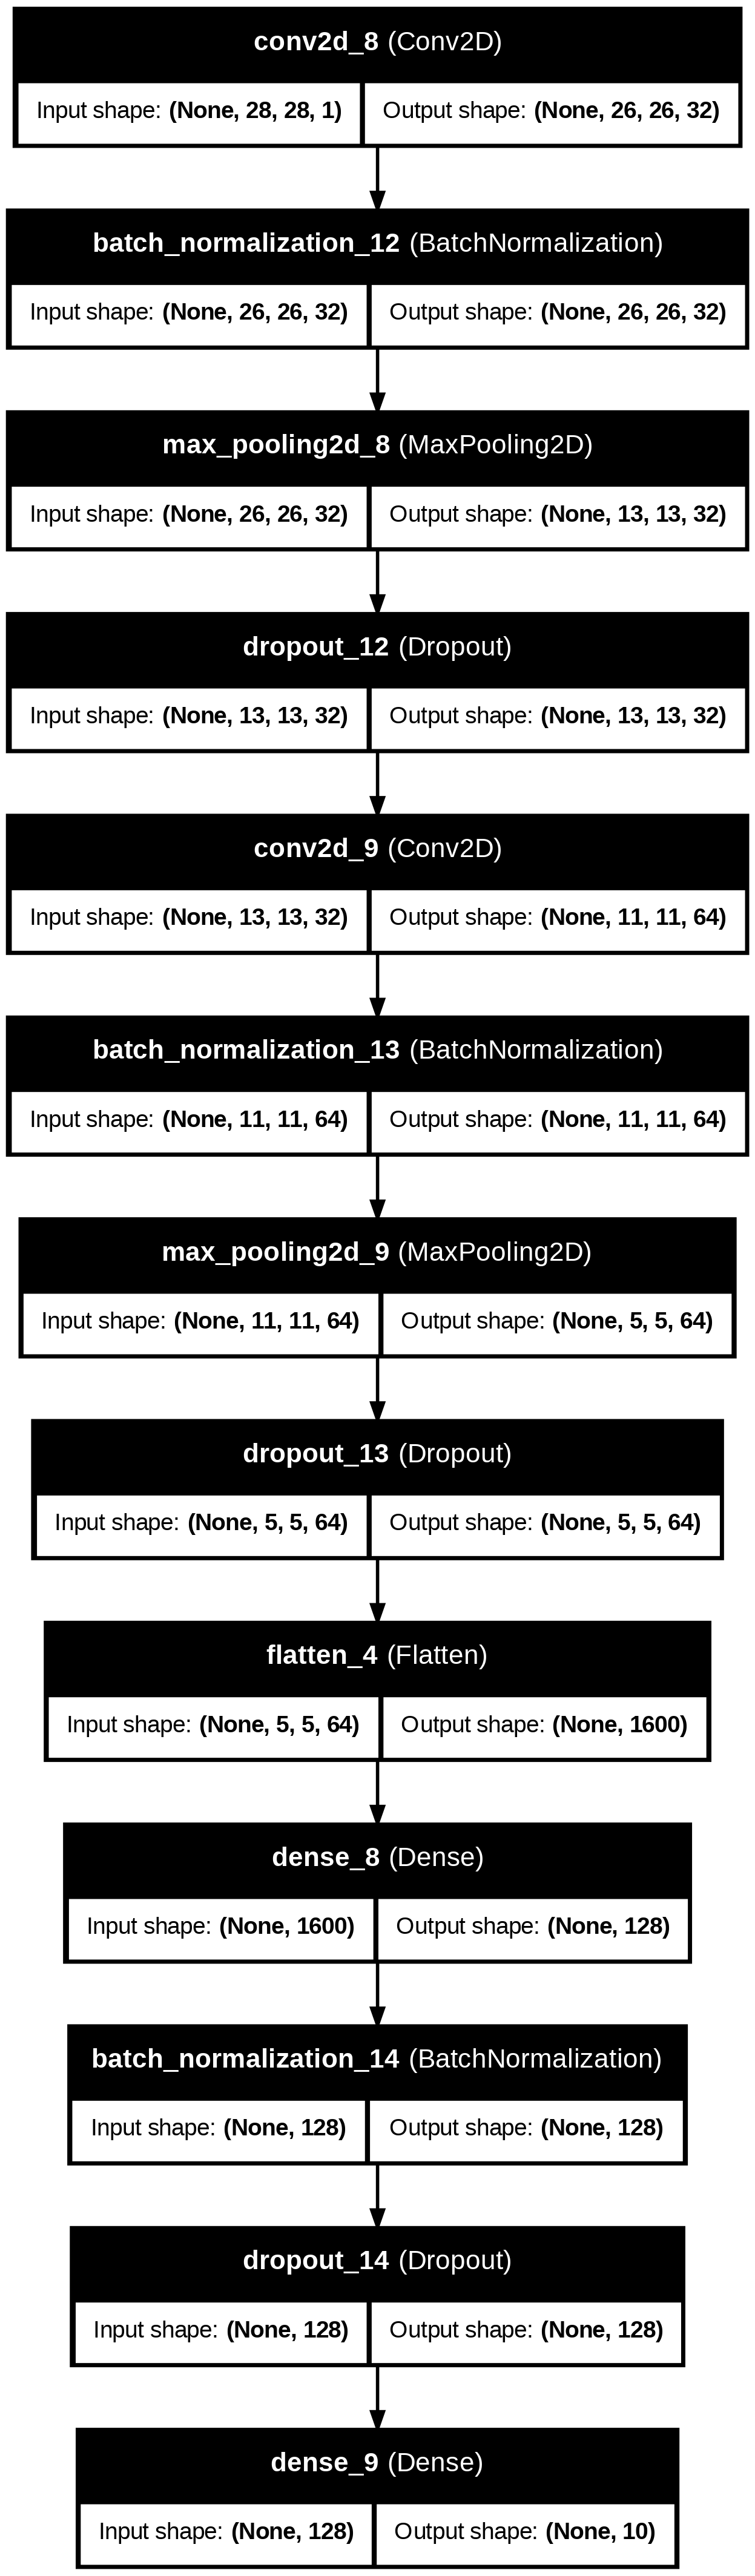

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True)


In [ ]:
#Let's test our model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9865 - loss: 0.0386
Loss : 0.032305583357810974
Accuracy : 0.9894000291824341


In [ ]:
from IPython.display import Javascript, display
from base64 import b64decode
from google.colab. output import eval_js

def draw_canvas(filename='drawing.jpg'):
    js = Javascript('''
        async function drawCanvas() {
            const div = document.createElement('div');

            // Create and set up canvas
            const canvas = document.createElement('canvas');
            canvas.width = 400;
            canvas.height = 400;
            canvas.style.border = '1px solid black';
            div.appendChild(canvas);
            document.body.appendChild(div);

            const context = canvas.getContext('2d');
            context.fillStyle = 'white';
            context.fillRect(0, 0, canvas.width, canvas.height);

            // Create and set up pencil width slider
            const sliderDiv = document.createElement('div');
            sliderDiv.innerHTML = 'Pencil Width: <input type="range" min="10" max="30" value="10" id="pencilWidth" style="width: 200px;">';
            div.appendChild(sliderDiv);

            let drawing = false;
            let pencilWidth = 1;

            document.getElementById('pencilWidth').oninput = function() {
                pencilWidth = this.value;
            };

            canvas.addEventListener('mousedown', (e) => {
                drawing = true;
                context.moveTo(e.offsetX, e.offsetY);
                context.lineWidth = pencilWidth;
            });

            canvas.addEventListener('mousemove', (e) => {
                if (drawing) {
                    context.lineTo(e.offsetX, e.offsetY);
                    context.stroke();
                }
            });

            canvas.addEventListener('mouseup', () => {
                drawing = false;
            });

            // Create and set up save button
            const saveButton = document.createElement('button');
            saveButton.textContent = 'Save';
            div.appendChild(saveButton);

            // Wait for Save to be clicked.
            await new Promise((resolve) => saveButton.onclick = resolve);

            const dataUrl = canvas.toDataURL('image/jpeg', 0.8);
            div.remove();
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('drawCanvas()')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
def preprocess(filename):
  import numpy as np
  from PIL import Image
  img = Image.open(filename)
  #image ko gray scale mein convert
  grey = img.convert('L')
  bw = grey.point(lambda x: 255-x)
  img_array = np.array(bw.resize((28,28)))
  img_array = img_array/255.0
  img_array = img_array.reshape(1,28,28,1)
  return img_array

In [ ]:
from IPython.display import Image
filename = draw_canvas()
display(Image(filename))
processed_image = preprocess(filename)
predict = model.predict(processed_image)

print("------------------------")
for i in range(10):
  print(f"{i} : {predict[0][i]}")
print("------------------------")
print(np.argmax(predict[0]))

<IPython.core.display.Javascript object>